## Model Evaluation and Refinement


<img src="car_image_2.png" width="75%">

### Evaluate and refine prediction models

The initial dataset that is raw and unprocessed is referred as the "population". This data undergoes a split into two datasets: the training and testing datasets. This division is often carried out randomly two ensure that the two subsets are representative of the overall population.

#### Training Set
The training set is typically the larger fo the two subsets. It is this data that the machine learning model learns  from. It's like the past experiences and knowledge that the model draws upon when making predictions. The aim is for the ML model to find the the underlying patterns and relationships in the data.

#### Test Set
Is like the future, unseen, and unknown factors. Once the model has been trained it is asked to to make predictions on the test data. The purpose is to see how well the data model can generalize its learning to new, unseen data. In other words, it a test to the model's ability to adapt its past learning to novel situations.

The model learns from the thesis (training data) and test its knowledge on the antithesis (test data). With this, the model can arrive to a syntehsis (a model that generalizes well to unseen data)

In [18]:
from sklearn.model_selection import cross_val_score # cross validation
from sklearn.model_selection import train_test_split # split data into training and testing sets
from sklearn.model_selection import cross_val_predict #Generates cross-validated estimates for each input data point
from sklearn.linear_model import Ridge # Ridge regression
from sklearn.linear_model import LinearRegression # Linear regression
from sklearn.model_selection import GridSearchCV # Grid search
from sklearn.preprocessing import StandardScaler # standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import PolynomialFeatures # for polynomial regression
from sklearn.pipeline import Pipeline # pipeline
import scipy #scientific computing
import pandas as pd
import matplotlib # visualization
import matplotlib.pyplot as plt # pyplot is matplotlib's plotting framework
import sklearn # machine learning
import seaborn as sns #visualization
import numpy as np #linear algebra
import warnings #ignore warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact, interactive, fixed, interact_manual # interactive plots. ipywidgets is the IPython HTML widgets for Jupyter to make interactive GUIs.

In [19]:
#Load data and store in a dataframe df:
df=pd.read_csv("module_5_auto.csv",header=0)
df.head()


,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [20]:
#Let's only use numeric data
df=df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [21]:
#Let's remove the columns 'Unnamed:0.1','Unnamed:0' since they don't provide any value to the models
df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)


In [22]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [23]:
#Creating a function called 'DistributionPlot' that generates a distribution plot comparing two sets of data represented by the variables/datasets RedFunction and BlueFunction.
def DistributionPlot(RedFunction,BlueFunction,RedName,BlueName,Title): #'RedName' is the label for the first distribution (RedFunction). Similarly, 'BlueName' is the label for the second distribution (BlueFunction). 'Title' is the title of the plot.
    width=12
    height=10
    plt.figure(figsize=(width,height)) #Setting the figure size.

    ax1=sns.distplot(RedFunction,hist=False,color='r',label=RedName) #Creates distribution plot for RedFunction data and turns off the histogram (meaning that we don't want to show the histogram bars on the plot). 'sns.display()' function is used to pliot a univariate disbribution of observation of observations
    ax2=sns.distplot(BlueFunction,hist=False,color='b',label=BlueName,ax=ax1) #'ax=ax1' means that we want to plot the second distribution on the first plot.

    plt.title(Title) #Setting the title of the plot
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show() #Display the plot
    plt.close() #Close the figure window



In [24]:
#Generate a plot showing the training and testing data points, and the predicted function using the trained linear regression model and polynomial transformation applied to 'x' values.
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    width=12
    height=10
    plt.figure(figsize=(width,height)) #Setting the figure size.

    #xtrain and y_train are used to plot the training data. xtest and y_test are used to plot the testing data.
    #lr:  linear regression object
    #poly_transform:  polynomial transformation object

    xmax=max([xtrain.values.max(), xtest.values.max()]) #Find the maximum value of the independent variable x on both the training and testing data.
    xmin=min([xtrain.values.min(), xtest.values.min()]) #Find the minimum value of the independent variable x on both the training and testing data.
    #xmax and xmin are used to set a range of x values for plotting the predicted fuctnion.

    x=np.arange(xmin,xmax,0.1) #Creates an array 'x' starting from the minimum value of x to the maximum value of x with an interval of 0.1. This array will be used to plot the predicted function.

    plt.plot(xtrain,y_train,'ro',label='Training Data') #Plots the training data as red circles ('ro') with the label 'Training Data'.
    plt.plot(xtest,y_test,'go',label='Test Data') #Plots the testing data as green circles ('go') with the label 'Test Data'
    plt.plot(x,lr.predict(poly_transform.fit_transform(x.reshape(-1,1))),label='Predicted Function') #Plots the predicted function using the trained linear regression model 'lr' and the polynomial transformation applied to 'x' using the polynomial transformation object 'poly_transform'. The predicted function is plotted as a solid line with the label 'Predicted Function'.
    #'poly_transform.fit_transform() is used to create a polynomial feature from the original 'x' values, effectively transforming the original linear data into  a polynomial model of 'x'. 
    plt.ylim([-10000,60000]) #Sets the y-axis limits to -10000 and 60000.
    plt.ylabel('Price') #Sets the y-axis label to 'Price'
    plt.legend() #Displays the legend on the plot.

### Part 1: Training and Testing

An important step in testing your model is to split your data into training and testing data. 


In [25]:
#We will place the target data price in a sepearate datagrame y_data
y_data=df['price'] #Dependent variable dataframe
y_data.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [26]:
#Drop the price data in dataframe x_data:
x_data=df.drop('price',axis=1) #Indepedent variables dataframe
x_data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,13.055556,0,1


In [27]:
#Randomly split our data into training and testing data using the function train_test_split.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_data,y_data,test_size=0.10,random_state=1) #test_size=0.10 means that 10% of the data is used for testing and 90% of the data is used for training. random_state=1 means that we are randomly splitting the data using a particular random seed.

print("Number of test samples:",x_test.shape[0]) #Prints the number of rows in the testing data.
print("Number of training samples:",x_train.shape[0]) #Prints the number of rows in the training data.


Number of test samples: 21
Number of training samples: 180


#### Question 1:
Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. 

In [28]:
#Set the parameter "random_state" equal to zero. The output of the function should be the following: "x_train_1" , "x_test_1", "y_train_1" and "y_test_1".
x_train_1, x_test_1, y_train_1, y_test_1=train_test_split(x_data,y_data,test_size=0.40,random_state=0)
print("Number of test samples:",x_test_1.shape[0])
print("Number of training samples:",x_train_1.shape[0])


Number of test samples: 81
Number of training samples: 120


In [29]:
from sklearn.linear_model import LinearRegression #import linear regression model
lre=LinearRegression() #create a linear regression object

#Fit the model using the feature horsepower
lre.fit(x_train[['horsepower']],y_train) #Fit the linear model using horsepower as the independent variable and price as the dependent variable.


LinearRegression()

In [30]:
#Let's calculate the R^2 on the test data:
lre.score(x_test[['horsepower']],y_test) #Returns the R^2 value for the test data. R^2 is a measure of how close the data are to the fitted regression line. The higher the R^2, the better the model fits your data. Best possible score is 1.0.

0.3635875575078824

In [31]:
#Let's calculate the R^2 on the training data: 
lre.score(x_train[['horsepower']],y_train)

0.6619724197515103

We can see the R^2 is much smaller using the test data compared to the training data. Why? This is an indicator of overfitting. Meaning that our model could have started to learn the underlying patterns of our data but also the noise and random fluctuations present in the training data. As a result, the model may struggle to generalize well to new, unseen data, like the test test data. The model's ability to generalize beyond the training data, to some extent or another, becomes limited due to the noise and irrelevant patterns learned during overfitting. 

#### Question 2:
Find the R^2 on the test data using 40% of the dataset for testing


In [32]:
x_train_1, x_test_1, y_train_1, y_test_1=train_test_split(x_data,y_data,test_size=0.40,random_state=0)
lre.fit(x_train_1[['horsepower']],y_train_1)
lre.score(x_test_1[['horsepower']],y_test_1)


0.7139364665406973

##### Cross-Validation Score
Sometimes we might not have sufficient testing data. As a result, you may want to perform cross-validation. 

In [33]:
from sklearn.model_selection import cross_val_score

Rcross=cross_val_score(lre,x_data[['horsepower']],y_data,cv=4) #First input indicates the type of model we are using to do the cross-validation (lr=linear regression_). x_data (predective/independent variable) and y_data (target/dependent variable) are the data we are using to train the model. cv indicates the number of partitions we want to split our data into.
Rcross #Returns an array of R^2 values using the different folds.

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [34]:
#Print and calulate the average R^2  and standard deviation of our estimate:
print("The mean of the folds is",Rcross.mean(),"and the standard deviation is",Rcross.std())

The mean of the folds is 0.522009915042119 and the standard deviation is 0.2911839444756029


In [35]:
#We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.
-1*cross_val_score(lre,x_data[['horsepower']],y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247591])

#### Question 3:
Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the 'horsepower' feature


In [36]:
Rc=cross_val_score(lre,x_data[['horsepower']],y_data,cv=2)
Rc.mean()

0.5166761697127429

We can also use the function 'cross_val_predict' to predict the output. 

In [37]:
from sklearn.model_selection import cross_val_predict
#Input the object 'lre', the feature 'horsepower' (independent variable), and the target data 'y_data'. The parameter 'cv' determines the number of folds
yhat=cross_val_predict(lre,x_data[['horsepower']],y_data,cv=4) #Returns an array of the predicted values for each data point when it's in the testing fold.
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

### Part 2: Overfitting, Underfitting and Model Selection
It turns out that the test data, sometimes referred as the 'out of sample data' is much better measure of how well your model performs in the real world. One reason for this is overfitting.

It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context


In [48]:
'''Let's create a Multiple Linear Regression object and tain the model
using 'horsepower', 'curb-weight', 'engine-size' and '
highway-mpg' as features.'''

lr=LinearRegression() #Create a linear regression object
lr.fit(x_train[['horsepower','curb-weight','engine-size','highway-mpg']],y_train) #Train the model using the four features

LinearRegression()

In [49]:
#Prediction using training data
yhat_train=lr.predict(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [50]:
#Prediction using test data
yhat_test=lr.predict(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Let's perform some model evaluation using our training and testing data separately. First, let's examine the distribution of the predicted values of the training data.

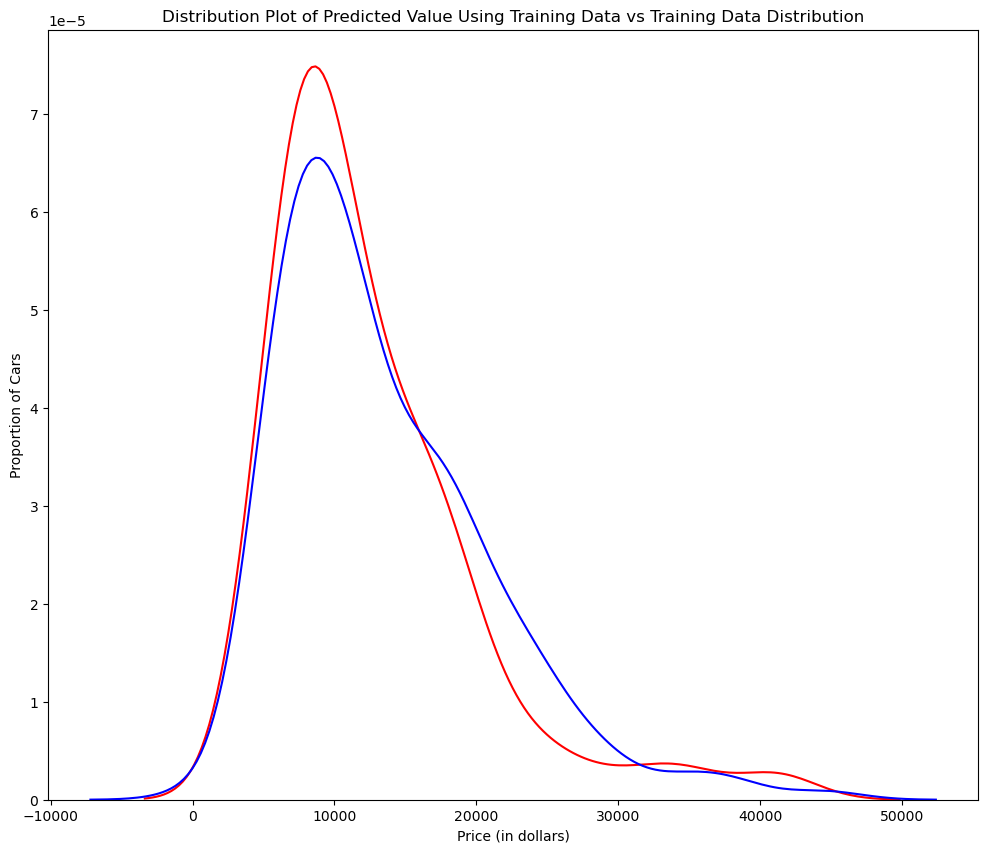

In [71]:
Title="Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution"
DistributionPlot(y_train,yhat_train,"Actual Values (Train)","Predicted Values (Train)", Title)

The model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values. 

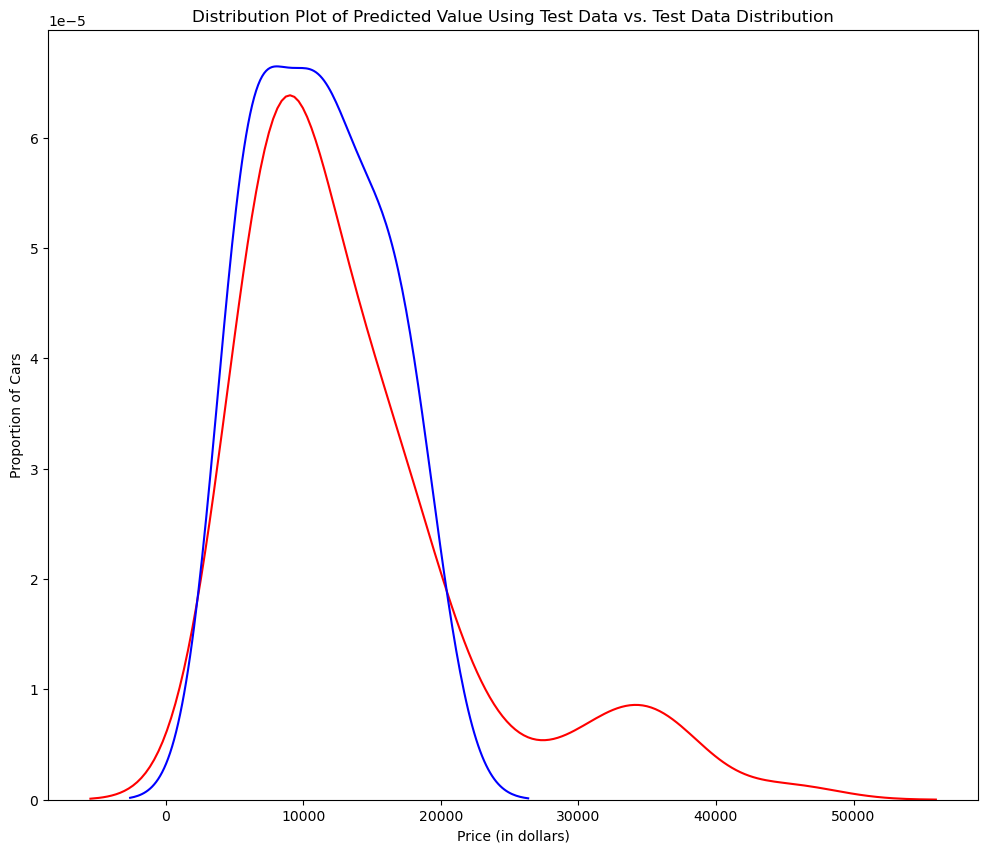

In [72]:
Title='Distribution Plot of Predicted Value Using Test Data vs. Test Data Distribution'
DistributionPlot(y_test,yhat_test,'Actual Values (Test)','Predicted Values (Test)',Title)

Comparing the first figure and the second figure, its evident that the distribution of the predicted value in the first figure it a much better fit for the training than the test data. 
The difference in Figure 2 is apparent in the range of 5,000-15,000.

This is where the shape of the distribution is extremely different. So, by using the test dataset to create a prediction mode, we droped our prediction accuracy. 

This is because when testing our model using the test set, the model does not perform as well because we are modeling noise, not the underlying process that generated the relationships between the variables (i.e. overfitting)

The generalization error is a measure of how well our data does at predicting previously unseen data. The error we obtain using our testing data is an approximation of this error. 



Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset. Let's create a degree 5 polynomial model. Higher degreee polynomails have more parameters, allowing them to have more complex shapes, which could increase the chance of overfitting the noise. 

<mark>To mitigate overfitting, it's essential to strike a balance between model complexity and generalization ability. The following can help with avoiding overfitting that performs well in training and test datasets:
* Regularization techniques (e.g. Ridge Regression)
* Cross validation
* Using the appropriate degree of polynomial
</mark>

In [73]:
from sklearn.preprocessing import PolynomialFeatures

In [74]:
#Let's use 55% of the data for training and the rest for testing:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.45,random_state=0)

#x_train and y_train are your training data and corresponding labels (the dependent variable values), respectively
#x_test and y_test are your testing data and corresponding labels, respectively.
#train_test_split randomly splits x_data and y_data into training and testing sets. 
#x_data and y_data are your input data. x_data is the array or dataframe containing your independent variables, and y_data is the array or series containing your dependent variable.


In [75]:
#We will perform a degree 5 polynomial transformation on the feature 'horsepower'. 
pr=PolynomialFeatures(degree=5) #Create a PolynomialFeatures object of degree 5
x_train_pr=pr.fit_transform(x_train[['horsepower']]) #Transform the training samples into polynomial samples of degree 5
x_test_pr=pr.fit_transform(x_test[['horsepower']]) #Transform the test samples into polynomial samples of degree 5
pr

PolynomialFeatures(degree=5)

In [76]:
#Let's create a Linear Regression model "poly" and train it:
poly=LinearRegression() #Create a linear regression object
poly.fit(x_train_pr,y_train) #Train the model using the polynomial features


LinearRegression()

In [77]:
#We see the output of our model using the method "predict". We assign the values to "yhat".
yhat=poly.predict(x_test_pr) #Predict the output on the test data
yhat[0:5] #Print the first five predicted values

array([ 6728.70591245,  7308.0293325 , 12213.78503102, 18893.18944398,
       19995.88763308])

In [78]:
#Let's take the first five predicted values and compare it to the actual targets
print("Predicted values:",yhat[0:4])
print("True values:",y_test[0:4].values)

Predicted values: [ 6728.70591245  7308.0293325  12213.78503102 18893.18944398]
True values: [ 6295. 10698. 13860. 13499.]


In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

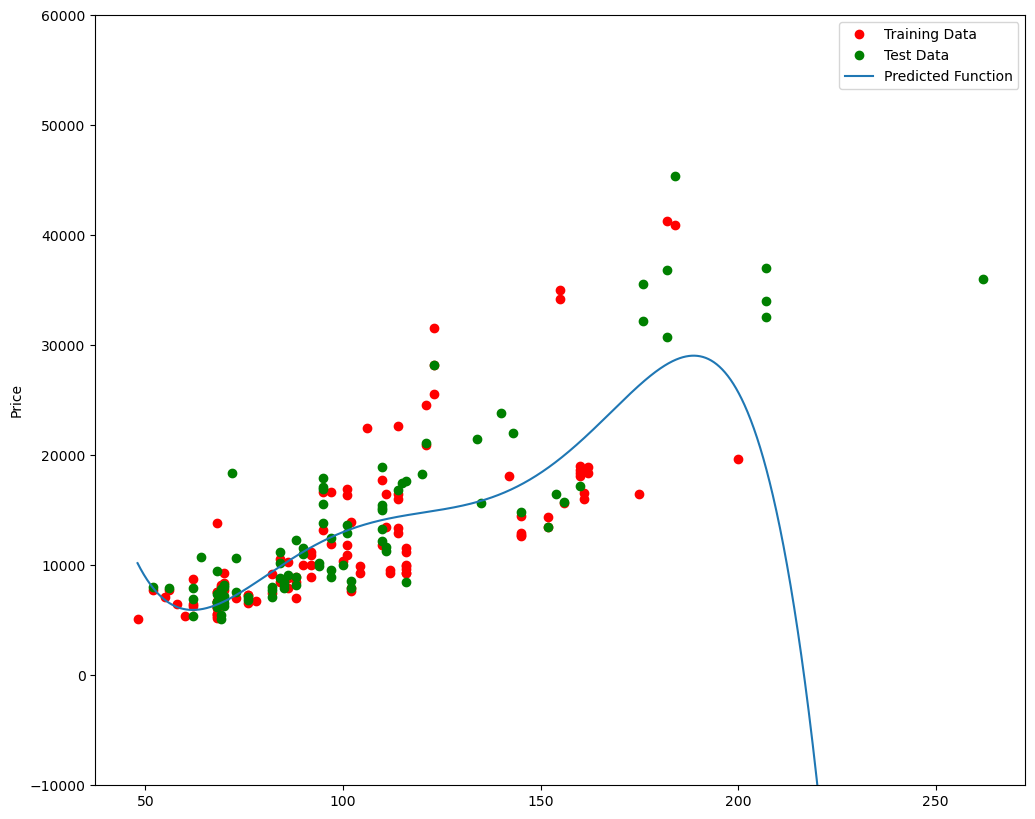

In [80]:
#We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.

PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)


We see that the estiamted function appears to track thed ata but around 200 horsepower, the function ebgins to diverge from the data points

In [81]:
#R^2 of the training data:
poly.score(x_train_pr,y_train)

0.5567716902637501

In [82]:
#R^2 of the test data:
poly.score(x_test_pr, y_test)

-29.871424242023895

Training data R^2=0.5567 

Test data R^2=-29.87

<mark>A negative R^2 is a sign of overfitting.</mark>

Let's see how the R^2 changes on the test data for different polynomials and then plot the results

Text(3, 0.75, 'Maximum R^2 ')

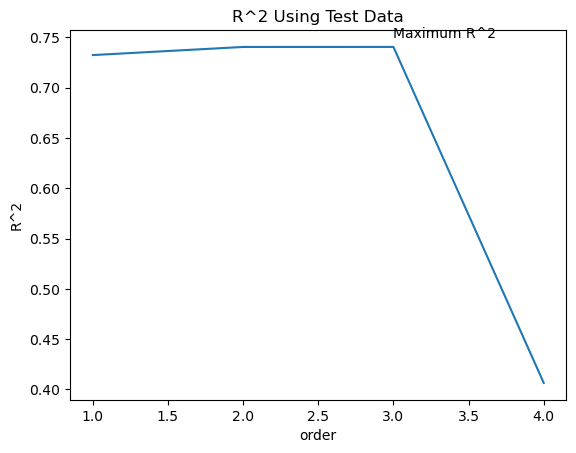

In [83]:
Rsqu_test=[] #Create an empty list
order=[1,2,3,4] #Create a list with the orders of the polynomial models
for n in order: #Iterate through the list
    pr=PolynomialFeatures(degree=n) #Create a PolynomialFeatures object of degree n
    x_train_pr=pr.fit_transform(x_train[['horsepower']]) #Transform the training samples into polynomial samples of degree n
    x_test_pr=pr.fit_transform(x_test[['horsepower']]) #Transform the test samples into polynomial samples of degree n
    lr.fit(x_train_pr,y_train) #Train the model using the polynomial features
    Rsqu_test.append(lr.score(x_test_pr,y_test)) #Append the R^2 of the test data to the list

plt.plot(order,Rsqu_test) #Plot the R^2 of the test data for each order
plt.xlabel('order') #Label the x-axis
plt.ylabel('R^2') #Label the y-axis
plt.title('R^2 Using Test Data') #Give the plot a title
plt.text(3,0.75,'Maximum R^2 ') #Add text to the plot

#We see the R^2 slowly but gradually increases until the order three polynomial, at wich point reaches its maximum R^2 score and afterwards declines drastically. 

In [84]:
def f(order, test_data):#Define a function that takes in the order of the polynomial model and the portion of the data used for testing
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0) #Split the data into training and testing sets
    pr = PolynomialFeatures(degree=order) #Create a PolynomialFeatures object of degree n. 
    x_train_pr = pr.fit_transform(x_train[['horsepower']]) #Transform the training samples into polynomial samples of degree n
    x_test_pr = pr.fit_transform(x_test[['horsepower']]) #Transform the test samples into polynomial samples of degree n
    poly = LinearRegression() #Create a linear regression object.
    poly.fit(x_train_pr, y_train) #Train the model using the polynomial features
    PollyPlot(x_train['horsepower'],x_test['horsepower'],y_train,y_test,poly,pr) #Plot the training and testing data, and the predicted function

In [85]:
#The following interface allows you to experiment with different polynomial orders and different amounts of data
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

<span style="color:red">Why does the shape of the predicted function changes as we modify the percentage of data used for testing? </span>

When you change the percentage of data that is used to training, you fundamentally change the amount of data that our model has for training. The less data the model has for training, the less the model has resources to learn form. Consequentially, our model becomes of susceptible to the noise. Thus, just like a child without healthy examples, it cannot grasp the underlying patterns that rule nature. 

Contrary to this, if our model/child, has more data to train, it is able to more accurately discern the general trends and is less influence by noise, randomness, and the anarchy of life. 

But, at the same time, when we have too much training and not enough testing, then our precision performance of what is needed will be low. On the other hand, our model/child, will gain accuracy in its aims. 

In short, changing the percentage of data used for testing is changing the learning environment for our model. 

Although higher order polynomials give more flexibility to our model in fitting the data, just like the sculptor is given more tools to add more detail to his sculpture, overfitting is akin to a sculptor so focused on the minute details that the overall form is distorted. 

In [87]:
#Question 4b) We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.
pr1=PolynomialFeatures(degree=2)


In [89]:
#Question 4b) Transform the training and testing samples for the feature 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".
x_train_pr1=pr1.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
x_test_pr1=pr1.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])


In [90]:
#Question 4c) How many dimensions does the new feature have? Hint: use the attribute "shape"
x_train_pr1.shape

(110, 15)

In [93]:
#Question 4d) Create a linear regression model "poly1" and train the object using the method "fit" using the polynomial features
poly1=LinearRegression().fit(x_train_pr1,y_train)

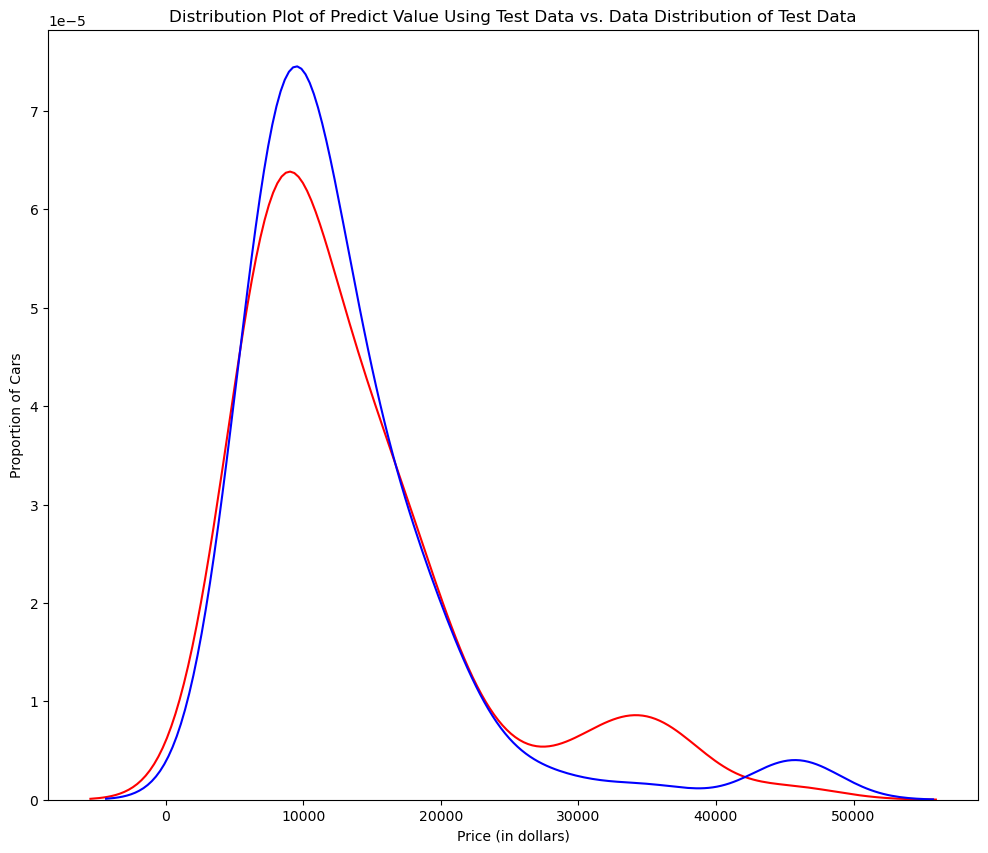

In [95]:
#Question #4e): Use the method "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predict test output vs. the actual test data.
yhat_test1=poly1.predict(x_test_pr1)
Title="Distribution Plot of Predict Value Using Test Data vs. Data Distribution of Test Data"

DistributionPlot(y_test,yhat_test1,"Actual Values (Test)","Predicted Values (Test)", Title)

In [ ]:
#Question #4f): Use the distribution plot to determine the two regions were the predicted prices are less accurate than the actual prices

'''The predicted value is higher than actual value for cars where the price is 
in the $10,000 range. Conversely, the predicted price is lower than the price 
cost in the $30,000 to $40,000 range. As such, the model is not as accurate in 
these ranges of $10,000 and $30,000-$40,000.'''

### Part 3) Ridge Regression

<span style="color:green">Ridge Regression</span> is a regression that is employed in a multiple regression model (a multiple regression considers the effect of one or more explanatory varaibles on some outcome of interest). It is a tool used when <span style="color:green">Multicollinearity</span> occurs. Multicollinearity is when there is a strong relationship/correlation between several independent variables. In this sense, Ridge Regression is used to regularize and reduce the standard error to avoid overfitting a regression model. 

In many cases, real data has outliers. This outliers can cause the correlation of data models that are not a good estiamte to the actual function. 

Ridge regression controls the order magnitud of the polynomial coefficients by introducing the parameter alpha. Alpha is a hypter-parameter that we select before fitting or training a model.

By training the model we mean the broader process of presenting a Machine Learning algorithm with data from which it can learn. Fitting a model refers more specifically to the step within the training process where the model adjust its parameters to best capture the relationship between the features and the target varaible in the training data. 

If we want to minimize the sum of the squared residuals plus the Ridge regression penalty, we would choose the Ridge regression line over the Least Squares Line. This is because the linear regression will leave a high degree of variance for other sets of data (i.e. the sum of squared residuals is large). This will cause the linear regression model to be overfit for its data set. 

The Ridge regression line might not fit one set of data well, but it does the best for all datasets/variables. For this we have to introduce an amount of bias into how the new Line is fit to the data. Thanks to this we get a significant decrease in variance. 

Least squares line (linear regression) has a large amount of bias. In contrast, the Ridge regression line has a small amount of variance, due to its small amount of bias. 


In Ridge regression we have two types of data:
* Training 
* Validation: this one is used to select our parameter alpha. The validation dataset is similar to the test dataset.
In order to determine the paramters alpha, we sue data for training and validations. The second set of data used for validation is similar to test data. 


With Ridge Regression we will see how the parameter alpha changes the model. Here, our test data will be used as validation data. 

In [98]:
#Let's perform a degree two polynomial transformation of our data:

pr=PolynomialFeatures(degree=2) #Create a PolynomialFeatures object of degree 2
x_train_pr=pr.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg','normalized-losses','symboling']]) #Transform the training samples into polynomial samples of degree 2
x_test_pr=pr.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg','normalized-losses','symboling']]) #Transform the test samples into polynomial samples of degree 2


In [101]:
from sklearn.linear_model import Ridge #import Ridge regression from sklearn
#Creating a Ridge regression object and setting the regularization parameter to 0.1
RidgeModel=Ridge(alpha=0.1)
#Fit the model using the fit method
RidgeModel.fit(x_train_pr,y_train)

Ridge(alpha=0.1)

In [104]:
#Obtain a prediction:
yhat=RidgeModel.predict(x_test_pr)
#Comparing the first five predicted samples to the test set
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151398 20836.22326843 19347.69543464]
test set : [ 6295. 10698. 13860. 13499.]


In [110]:
'''Here, we are trying to use Ridge Regression as a regularization teachnique to
prevent overfitting in a machine learning model.'''

from tqdm import tqdm #import tqdm library to display the progress bar
Rsqu_test=[] #Create an empty list used to hold the R^2 values for the test data
Rsqu_train=[] #Create an empty list used to hold the R^2 values for the train data
dummy1=[] #Create an empty list
Alpha=10*np.array(range(0,100)) #Create a list of 100 values from 0 to 1000 in increments by 10. These values will be used as the regularization parameter alpha.
pbar = tqdm(Alpha) #Create a progress bar object

for alpha in pbar: #Iterate through the list of alpha values. For each value of 'alpha', a Ridge regression model is created and trained.
    RidgeModel=Ridge(alpha=alpha) #Create a Ridge regression object and set the regularization parameter to alpha
    RidgeModel.fit(x_train_pr,y_train) #Fit the model using the training data
    test_score, train_score=RidgeModel.score(x_test_pr,y_test),RidgeModel.score(x_train_pr,y_train) #Obtain the R^2 of the test and training data.
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score}) #Display the R^2 of the test and training data.

    Rsqu_test.append(test_score) #Append the R^2 of the test data to the list
    Rsqu_train.append(train_score) #Append the R^2 of the train data to the list




100%|██████████| 100/100 [00:00<00:00, 297.73it/s, Test Score=0.54, Train Score=0.861]


* R^2 score for our test data=0.54

* R^2 score for our training data=0.861

This quantifies the efficiency of our model.

<span style="color:red"> Why do we have different R^2 scores for the testing and training data? </span>

The R^2 value for the training data measures how well the model fits the data it was trained on. A higher R^2  value indates that teh model expalins a larger portion of the varaince in the training data. The model has learned the nances, the ups and downs, the ebb and flow of the training data, and hence performs wells.

The R^2 value for the test data measures how well the model generalizes to new, unseen data. It's not uncommon for a model to have a lower R^2 value for test data compared to the R^2 of the training data. This can occur if the model is overfitting the training data. It's so attuned to the training data that it performs poorly when faced with new data that it hasn't seen before. In other words, it has failed to grasp the general laws governing the behavior of the dependent variable and instead is caught up in the specific details of the training set. 

What we seek is a model that fits the training data well, yet also generalizes effectively to new data. Achieving this balance, this synthesis, is one of the fundamental challange 



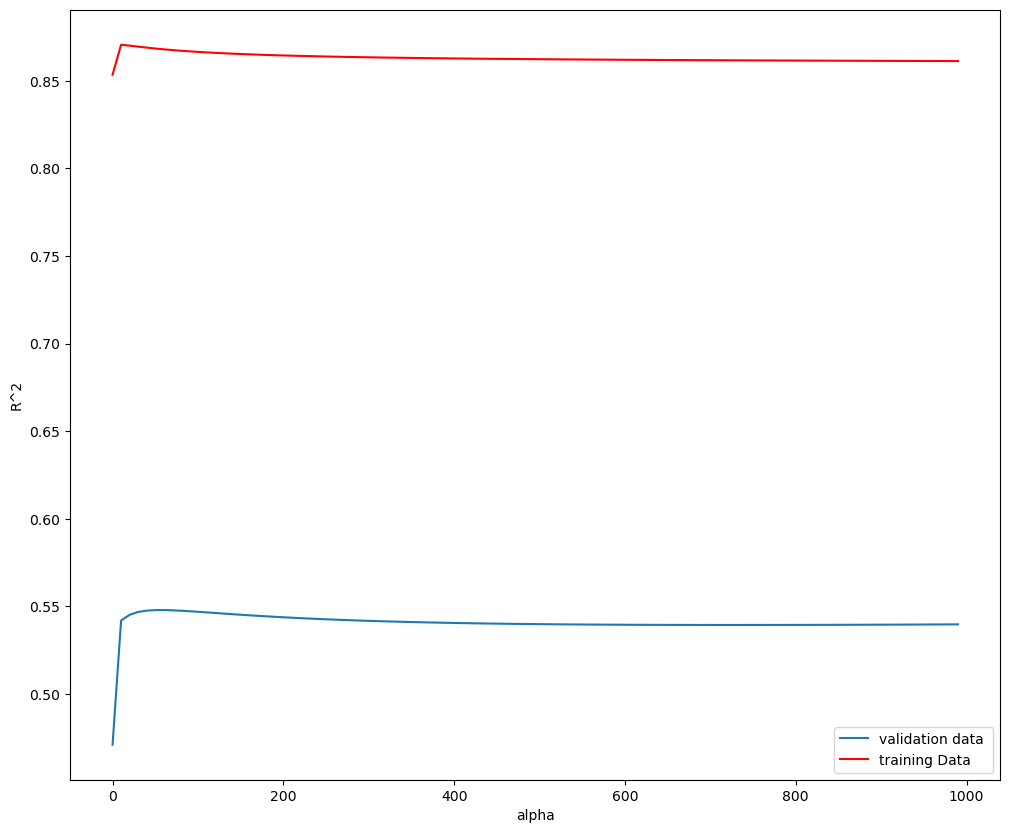

In [112]:
#We can plot out the value of R^2 for different alphas:

width=12
height=10
plt.figure(figsize=(width,height)) #Setting the figure size.

plt.plot(Alpha,Rsqu_test,label='validation data ')
plt.plot(Alpha,Rsqu_train,'r',label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()


The plateau we see for both the validation and the training data is the result of the interplay between bias and varaince in our model, modulated by the regularization strength of 'alpha' in our Ridge regression. 


In the initial stages, when alpha is low, the model is more complex (i.e. it has a higher capacity to learn from the training data). As 'alpha' increase, the regularization term starts to dominate, reducing the complexity of the model. This results in an increase in the model's bias and a decrease in its variance.

Up to a certain point, the increase in bias is compensated by the decrease in varaince, leading to an increase in the R^2 score. However, at one point, the increase in bias starts to hurt the model's performance more than the decerase in variance helps it. This causes the R^2 to pleteau.

In other words, when 'alpha' is below 200, the model is still flexible enough to learn effectively from the data. But as 'alpha' increase beyond 200, the model becomes too ridig, and its ability to learn from the data is hampered, causing the R^2 score to pleteau. 

Indeed, this is a manifestation of the Law of Transformation of Quantity into Quality (which states that changes can only occur by the quantitative addition or subtraction of matter or motion/energy). The quantitative increase in 'alpha; leads to a qualitative change in the model's performance. 

What this suggest is that increase the regularization strength of alpha does not improve the model's peformance on either the training and validation data. Take tha maximum point of y (R^2) and select that as the optimum value of data to optimize our modeling. 

<span style="color:green">Bias</span> refers to the simplifying assumptions made by a model to make the target function easier to approximate. High bias can cause the algorithm to miss the relevant relations between features and target outputs, leading to underfitting. Dialectically, our high-bias model fails to fully grasp the contradictions within the data (the forces that supress and elevate the behavior of our data).

<span style="color:green">Variance</span>, on the other hand, is the amount by which our model would change if we estimated it using a different training dataset. Models with high variance pay a lot of attention to the training data and can capture random noise in the training data rather than the intended outputs (i.e. overfitting). In other words, our hgih-variance model is lost in the details, caught in the swirling eddies and losing sight of the overarching current. 

So we stand between the abyss of oversimplification (bais based) and overcomplication (with too much variance). Striking a good balance between under and over fitting is key to building an optimum model. Its a key dilectical principle of the unity and struggle of opposite, in which the struggle against oversimplification and overcomplication leads to the synthesis for an optimum model, the optimization manifesting through the R^2 score. 

In this context, in the Ridge regression model, the alpha acts as the mediator in the balance between over-simplification and over-complication. A larger alpha increase the model's bias and reduces its variance (tilting towards over-simplification), ipso facto, makign it less flexible. A smaller alpha, on the other hand, reduces the model's bias and increases its variance, making the model more flexible but less stable. Chosing the right alpha is the the optimization between the bias-variance trade-off. 

In [116]:
'''Question #5) Perform Ridge regresison. 
Calculate the R^2 using the polynomial features, 
use the training data to train the model and use the test data 
to test the model. The parameter alpha should be set to 10.'''

RidgeModel=Ridge(alpha=10) #Create a Ridge regression object and set the regularization parameter to 10
RidgeModel.fit(x_train_pr,y_train) #Fit the model using the training data
RidgeModel.score(x_test_pr,y_test) #Obtain the R^2 of the test data

print('The R^2 of the test data is',RidgeModel.score(x_test_pr,y_test), 'where alpha=10')


The R^2 of the test data is 0.5418576440207269 where alpha=10


### Part 4: Grid Search
<span style="color:green">Grid Search</span> is the means of scikit-learn to automatically iterate over hyper-parameters using cross-validations. <span style="color:green">Hyper-parameters</span> are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning. 

Grid search takes the model or objects you would like to train and different values of the hyper-parametes. It then calculates the MSE or R^2 for various for various hyper-parameters values, allowing you to chose the best values. That is, in each model we have a error, and Grid search picks the hyper-parameter that minimizes the error (Mean Squared Error or MSE). We use the validation data to pick the best hyper-parameter. 

To select the hyper-parameter, we split our data into three parts:

* Training
* Testing
* Validation

The term alpha is a hyperparameter, Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simple. 

One of the advantages of Grid Search is how quickly we can test multiple parameters. For example, ridge regression has the option to normalize the data.

In [118]:
from sklearn.model_selection import GridSearchCV #import GridSearchCV from sklearn
#Creating a dictionary of parameter values:
parameters1=[{'alpha':[0.001,0.1,1,10,100,1000,10000,100000,100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [120]:
RR=Ridge() #Create a Ridge regression object
RR

Ridge()

In [121]:
#Creating a ridge gird search object

'''GridSearchCV has the following arguments:

1) estimator: the machine learning model that you want to tune. 
In this case, it's the Ridge regression object 'RR'.
2) param_grid: A dictionary or list that defines the hyperparameters 
to be optimized and the range of values for each hyperparameter.
In our case, its the dictionary of the alpha parameter values
'parameters1'
3) cv: determines the cross-validation splitting strategy. In our case, 4 folds.'''

Grid1=GridSearchCV(RR,parameters1,cv=4) 

In [122]:
#Fit the model:
Grid1.fit(x_data[['horsepower','curb-weight','engine-size','highway-mpg']],y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [126]:
'''The 'best_estomator_' object finds the best parameter values on the 
validation data. We can obtain the estimator with the best
parameters and assign it to the variable BestRR as follows:'''

'''The 'best_estomator_' object finds the best parameter 
values that performed the best during cross-validation.
We obtain the estimator with the ebst parameters and assign 
it to the varaible BestRR'''
BestRR=Grid1.best_estimator_
BestRR
#BestRR is a Ridge regression object with the best parameters. In this case, the best alpha value is 10,000. 

Ridge(alpha=10000)

In [125]:
#We test our model on the test data: 
BestRR.score(x_test[['horsepower','curb-weight','engine-size','highway-mpg']],y_test)

0.8411649831036152

0.8411...is the R^2 score of our test data when evaluated with our finely tunned Ridge Regression model 'BestRR'

In this sense, our R^2 value suggests that ~84.1% of the variance in the target variable 'price' can be explained by the features horsepower, curb-weight, engine-size, and highway-mpg in our model. 

Our ~84.1% is the result of GridSearchCV navigating the which alpha hyperparametrs best fit for our model. The end result if a optimal Ridge Regression model that gives us a relatively high R^2 score. 

#### Question 6

In [38]:
#Question 6) Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters

parameters2=[{'alpha':[0.001,0.1,1,10,100,1000,10000,100000,100000]}] #Create a dictionary of alpha hyper-parameter values
RR_1=Ridge() #Create a Ridge regression object
Grid2=GridSearchCV(RR_1,parameters2,cv=4) #Create a grid search object
Grid2.fit(x_data[['horsepower','curb-weight','engine-size','highway-mpg']],y_data) #Fit the model using the training data
BestRR_1=Grid1.best_estimator_ #Obtain the estimator with the best parameters
BestRR_1.score(x_test[['horsepower','curb-weight','engine-size','highway-mpg']],y_test) #Test the model on the test data

NameError: name 'Grid1' is not defined

The results on a training data is not the best indicator of how your model performs; we should be using a test dataset to get a better idea of the performance of our model.

The reason is that the model that has been trained on a training dataset has seen this data before, its well-acquainted with its nooks and crannies. As such, a model may perform remarkably well on a training data, but this could simply be because the model memorized the training data (i.e. overfitting). 

The true test of a model lies in its ability to generalize, to perform well on unseen data, to predict the future based on the past. This is where the test dataset comes in. If a model performs well on the test data, its a good indcation that the model has truely learned the underlying patterns in the data, rather than just memorizing the training set. 

<mark>Its the difference between knowing the answer in advance and being able to figure it out on your own. One is memorization, the other is true learning. A good synthesis of a model is one that performs well on both, training and testing, that is, its strikes a balance between learning and generalization.</mark>